## Importing library & settings for library<a class="anchor" id="import"></a>


In [11]:
import numpy as np
import pandas as pd
import os
import math

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [13]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-07-27 16:47:29--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.10.101, 142.251.10.100, 142.251.10.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.10.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u85kbqhfq77mokrft1co4pa4m9c3v5ua/1658940450000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=6ef02991-c718-4c77-b5bd-008f5eede432 [following]
--2022-07-27 16:47:31--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u85kbqhfq77mokrft1co4pa4m9c3v5ua/1658940450000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=6ef02991-c718-4c77-b5bd-008f5eede432
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.12.132, 2404:6800:4003:c11::84
Connecting to doc-0k

In [14]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# center all variables
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Lasso

from sklearn import datasets
from sklearn import tree
from sklearn.metrics import r2_score

from sklearn import tree

from sklearn.svm import LinearSVR

## Loading the data & previewing<a class="anchor" id="load"></a>

In [15]:
df = pd.read_excel('Data Collection of specific estates_2022.07.22.xlsx')

In [16]:
df.head()

,id,rent,RVD Rent Index,RVD_average_rent,Month_index,year,month,property_with_phase,phase_block_others,floor_level,...,ind_mtr_East_Rail_line,ind_mtr_Kwun_Tong_line,ind_mtr_Island_line,ind_mtr_Tung_Chung_line,ind_mtr_Airport_Express,ind_mtr_Tseung_Kwan_O_line,ind_mtr_Tuen_Ma_line,ind_mtr_Disneyland_Resort_line,ind_mtr_South_Island_line,ind_mtr_Kowloon_Canton_railway
0,1,15800,NaN,NaN,202206,2022,6,日出康城 Montara,2B座,高層,...,0,0,0,0,0,1,0,0,0,0
1,2,18000,NaN,NaN,202206,2022,6,日出康城 首都,1座 R,低層,...,0,0,0,0,0,1,0,0,0,0
2,3,17800,NaN,NaN,202206,2022,6,日出康城 領都 - 領峯,8座 R,低層,...,0,0,0,0,0,1,0,0,0,0
3,4,13000,NaN,NaN,202206,2022,6,日出康城 晉海II,3A座,高層,...,0,0,0,0,0,1,0,0,0,0
4,5,15000,NaN,NaN,202206,2022,6,日出康城 Marini,3A座,高層,...,0,0,0,0,0,1,0,0,0,0


In [17]:
print(np.shape(df))

(31964, 50)


## Defining columns and preparing data according to columns<a class="anchor" id="define"></a>

### Defining columns - direct from source<a class="anchor" id="define_direct"></a>

In [18]:
col_drop_1st = ["id", "property_with_phase", "phase_block_others", "floor_level", "flat", "net_area_m2", "Unitrent_per_m", "download_source", "estate_ID", "estate_name", "Month_index", "CPI(A)", "CPI(B)", "CPI(C)"]
len(col_drop_1st)

14

In [19]:
col_drop_after_working = ["estate_earliest_date_move_in_year", "year", "month"]
len(col_drop_after_working)

3

In [20]:
col_values = ["floor_level_ind", "net_area_ft", "area_group", "bedroom", "mtr_distance_m"]
len(col_values)

5

In [21]:
col_values_RVD = ["RVD Rent Index", "RVD_average_rent"]
len(col_values)

5

In [22]:
col_categorical = ["RVD_size_class", "estate_region", "estate_district", "estate_region_RVD", "estate_primary_school", "estate_secondary_school", "estate_blding_manager", "ind_estate_Swimming_pool", "ind_estate_Clubhouse", "ind_estate_Kids_facilities", "ind_estate_Sports_facilities", "ind_estate_Catering_facility", "ind_estate_Entertainment_facility", "ind_estate_Mall", "ind_estate_Health_n_beauty", "ind_estate_Recreational_area", "estate_closest_mtr", "ind_mtr_Tsuen_Wan_line", "ind_mtr_East_Rail_line", "ind_mtr_Kwun_Tong_line", "ind_mtr_Island_line", "ind_mtr_Tung_Chung_line", "ind_mtr_Airport_Express", "ind_mtr_Tseung_Kwan_O_line", "ind_mtr_Tuen_Ma_line", "ind_mtr_Disneyland_Resort_line", "ind_mtr_South_Island_line"]
len(col_categorical)

27

In [23]:
col_response = ["rent", "Unitrent_perft"]
len(col_response)

2

### Defining columns - derivatives<a class="anchor" id="define_derivative"></a>

In [24]:
df["estate_year"] = df["estate_earliest_date_move_in_year"].apply(lambda x: 2022 - x)
col_values.append("estate_year")
df["estate_year"].head()

0    14
1    14
2    14
3    14
4    14
Name: estate_year, dtype: int64

In [25]:
def change_year_month_to_month(year, month):
    return((year - 2022) * 12 + (month - 6))

df["month_from_now"] = df[["year", "month"]].apply(lambda x: change_year_month_to_month(x["year"], x["month"]), axis=1)
col_values.append("month_from_now")
df["month_from_now"].head()

0    0
1    0
2    0
3    0
4    0
Name: month_from_now, dtype: int64

### Preparing data<a class="anchor" id="prepare"></a>

In [27]:
df[col_categorical] = df[col_categorical].astype("category")

In [28]:
col_drop = col_drop_1st + col_drop_after_working

## Exploratory analysis for data (Values)<a class="anchor" id="ex_values"></a>


### Exploratory analysis for data (Values) - Codes<a class="anchor" id="ex_values_codes"></a>


In [29]:
data = df[col_values + col_values_RVD + col_response].copy()

In [30]:
data["log_rent"] = data["rent"].apply(np.log1p)
data["log_Unitrent_perft"] = data["Unitrent_perft"].apply(np.log1p)

In [31]:
print(data.describe())

       floor_level_ind   net_area_ft    area_group       bedroom  \
count     31964.000000  31964.000000  31964.000000  31964.000000   
mean          1.975222    574.013546      3.630428      2.265611   
std           0.850903    222.297007      0.914676      0.760887   
min           0.000000    173.000000      1.000000      0.000000   
25%           1.000000    441.000000      3.000000      2.000000   
50%           2.000000    528.000000      3.000000      2.000000   
75%           3.000000    680.000000      4.000000      3.000000   
max           3.000000   4190.000000      9.000000     10.000000   

       mtr_distance_m   estate_year  month_from_now  RVD Rent Index  \
count    31964.000000  31964.000000    31964.000000    30689.000000   
mean       651.426645     20.863972      -16.089319      182.089690   
std        861.809569     13.513698       10.363158       14.808143   
min         26.510318      2.000000      -36.000000      132.400000   
25%        175.801766     10.000

In [32]:
%matplotlib inline
def plot_subplots_box(data, n_row = 1):
  fig, axs = plt.subplots(ncols=math.ceil(np.shape(data)[1] / n_row), nrows=n_row, figsize=(20, 10))
  index = 0
  axs = axs.flatten()
  for k,v in data.items():
      sns.boxplot(x=None, y=str(k), data=data, ax=axs[index])
      index += 1
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [33]:
%matplotlib inline
def plot_subplots_regplot(data, y, n_row = 1):
  min_max_scaler = preprocessing.MinMaxScaler()
  x = pd.DataFrame(data=min_max_scaler.fit_transform(data), columns=data.columns)
  fig, axs = plt.subplots(ncols=math.ceil(np.shape(data)[1] / n_row), nrows=n_row, figsize=(20, 10))
  index = 0
  axs = axs.flatten()
  for i, k in enumerate(data.columns):
      sns.regplot(y=y, x=x[k], ax=axs[i], line_kws={"color": "red"})
      index += 1
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Exploratory analysis for data (Values) - Results<a class="anchor" id="ex_values_results"></a>


In [34]:
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column floor_level_ind outliers = 0.00%
Column net_area_ft outliers = 3.13%
Column area_group outliers = 3.02%
Column bedroom outliers = 2.11%
Column mtr_distance_m outliers = 9.22%
Column estate_year outliers = 0.00%
Column month_from_now outliers = 0.00%
Column RVD Rent Index outliers = 6.70%
Column RVD_average_rent outliers = 0.13%
Column rent outliers = 4.79%
Column Unitrent_perft outliers = 2.67%
Column log_rent outliers = 2.03%
Column log_Unitrent_perft outliers = 0.76%


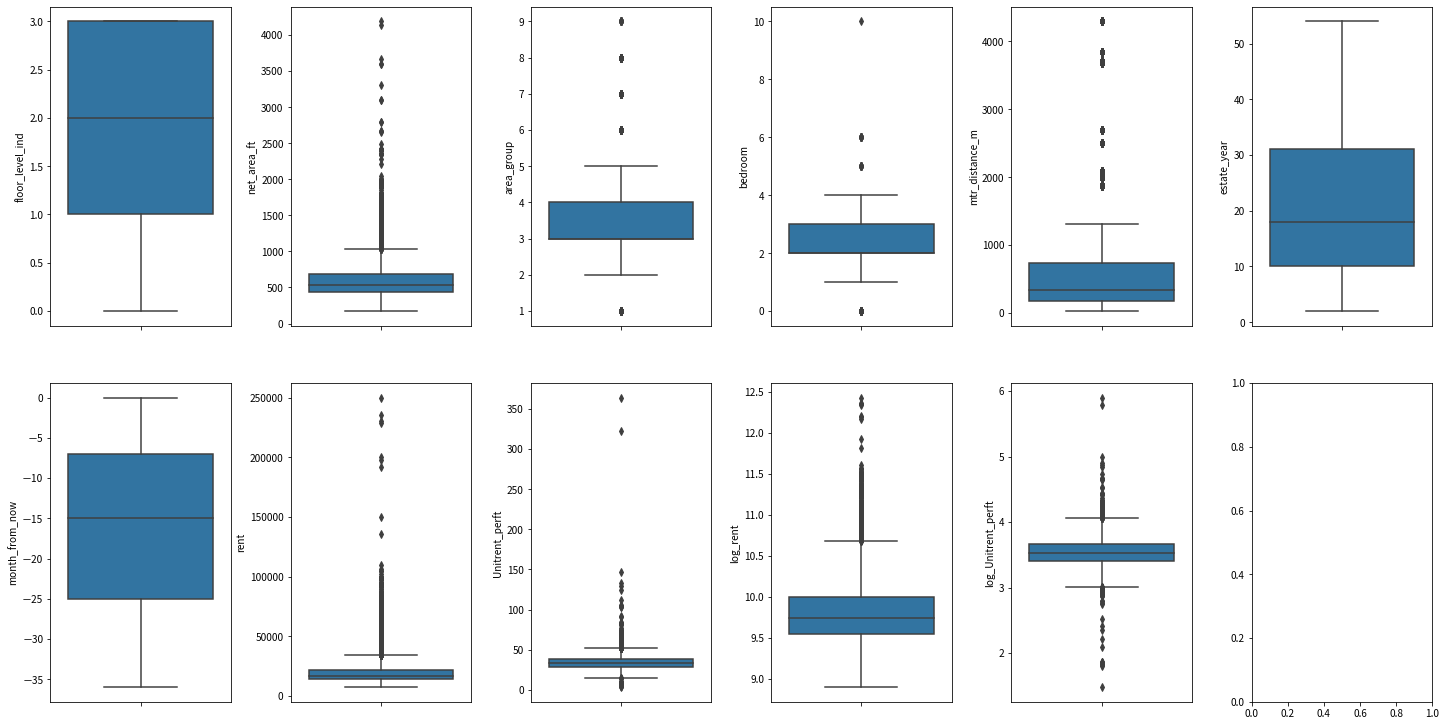

In [35]:
plot_subplots_box(data.drop(columns=col_values_RVD, axis=1), 2)

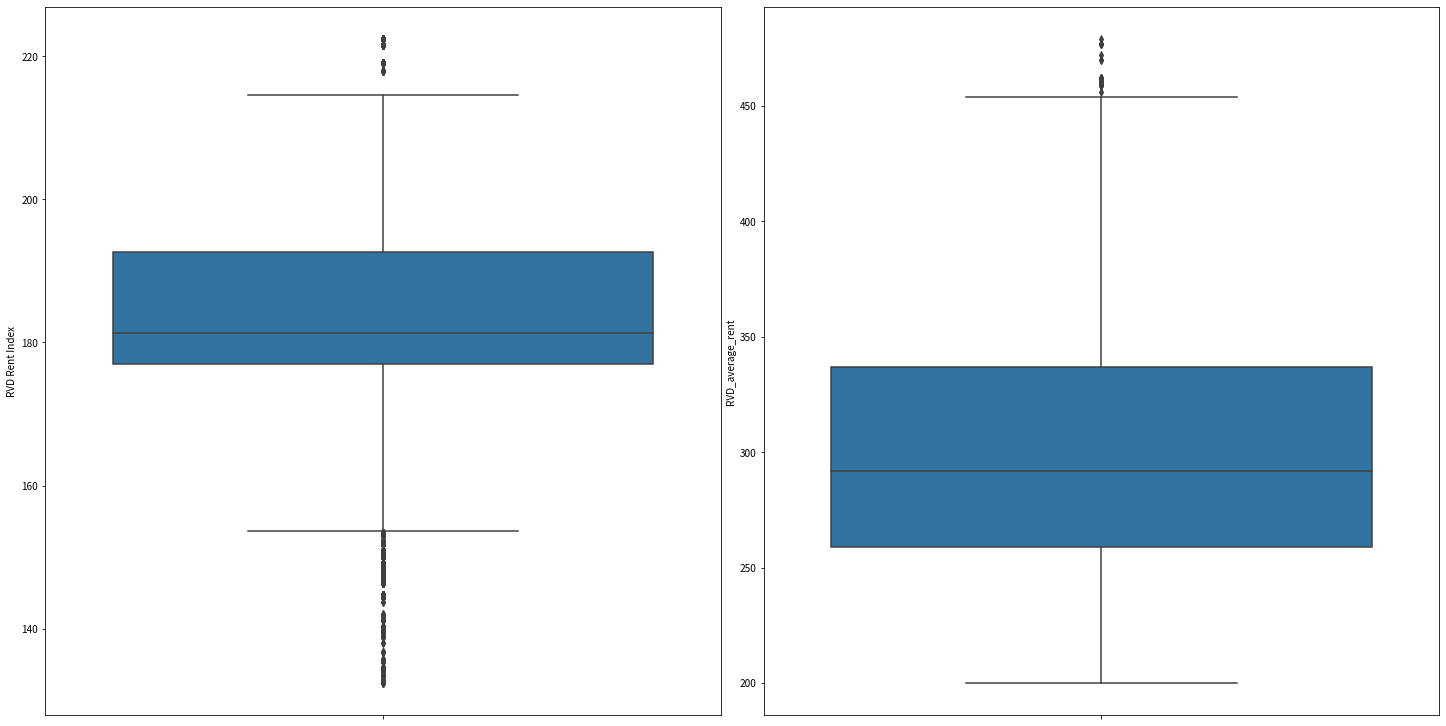

In [36]:
plot_subplots_box(data[col_values_RVD].dropna(), 1)

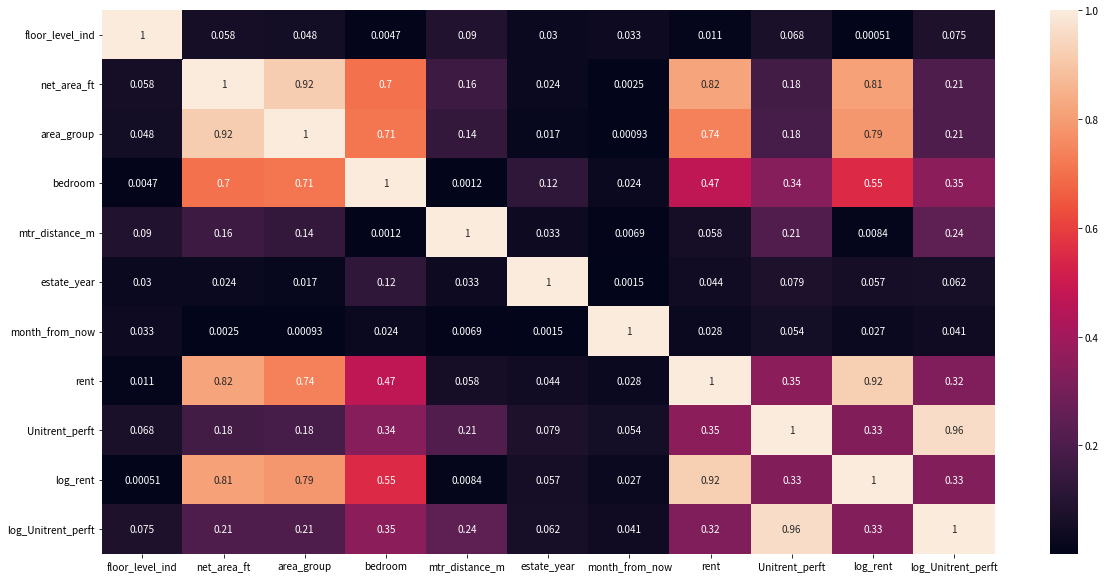

In [37]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.drop(columns=col_values_RVD, axis=1).corr().abs(),  annot=True)

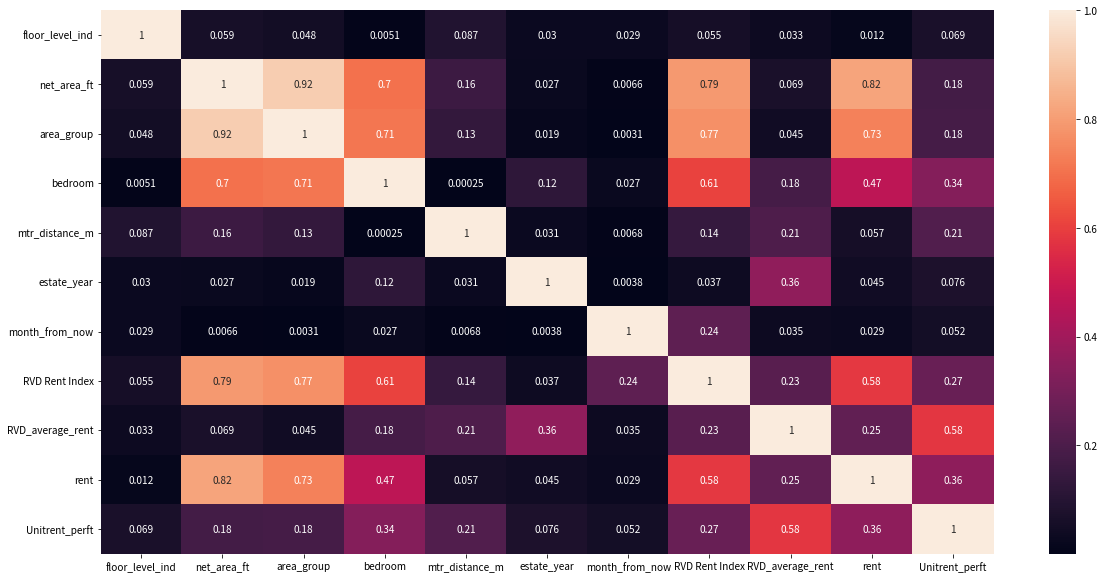

In [38]:
plt.figure(figsize=(20, 10))
sns.heatmap(data[col_values + col_values_RVD + col_response].dropna().corr().abs(),  annot=True)

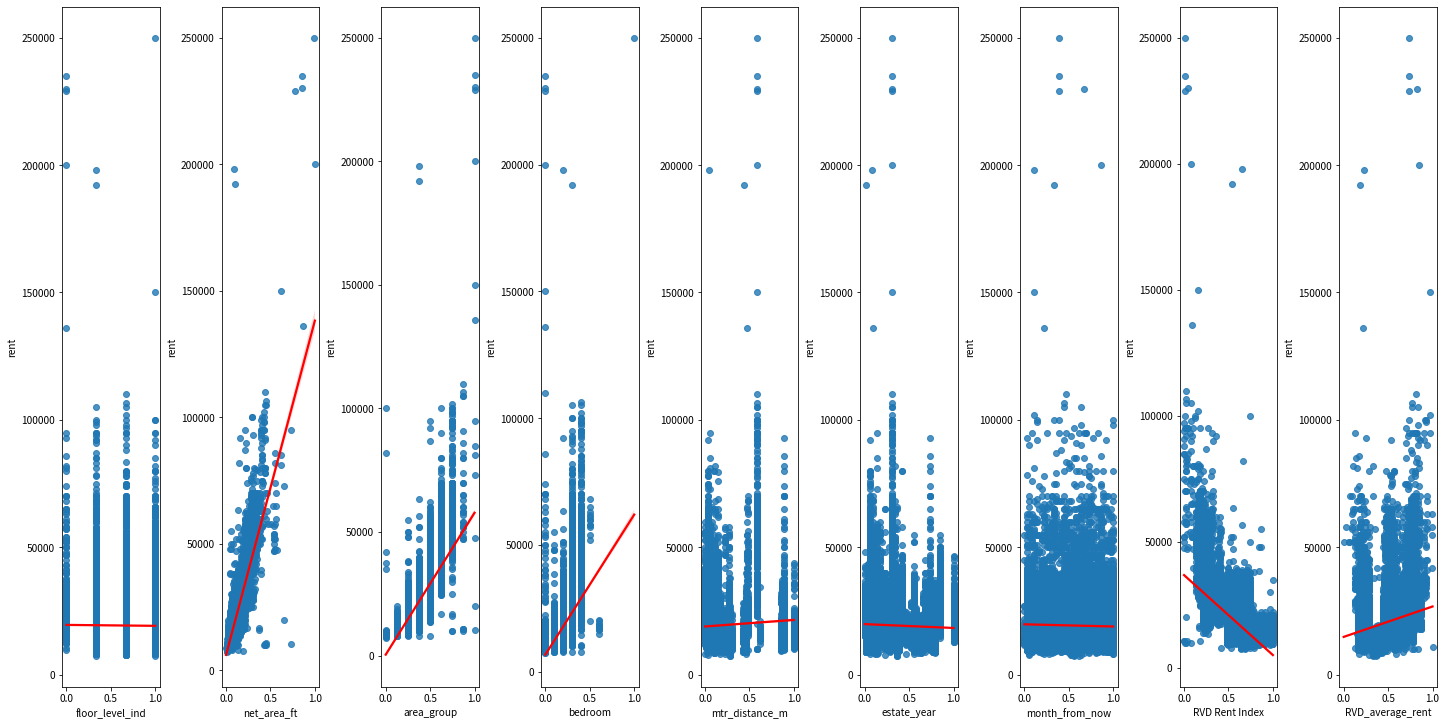

In [39]:
plot_subplots_regplot(data[col_values + col_values_RVD], data["rent"])

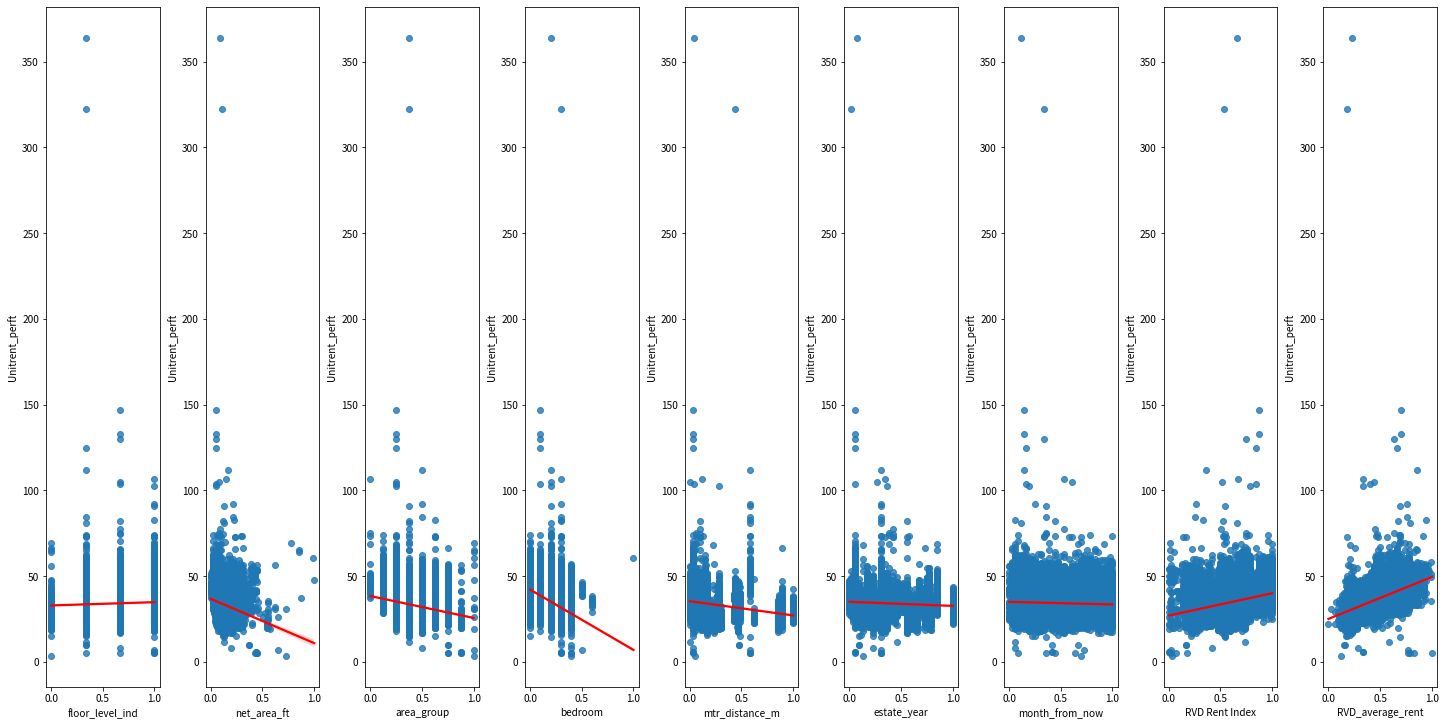

In [40]:
plot_subplots_regplot(data[col_values + col_values_RVD], data["Unitrent_perft"])

## Exploratory analysis for data (Categorical)<a class="anchor" id="ex_cat"></a>


### Exploratory analysis for data (Categorical) - Codes<a class="anchor" id="ex_cat_codes"></a>


In [41]:
data = df[col_categorical + col_response].copy()

In [42]:
%matplotlib inline
def plot_subplots_stripplot(data, y, n_row = 1):
  fig, axs = plt.subplots(ncols=math.ceil(np.shape(data)[1] / n_row), nrows=n_row, figsize=(20, 10))
  index = 0
  axs = axs.flatten()
  for i, k in enumerate(data.columns):
      sns.stripplot(y=y, x=data[k], ax=axs[i])
      index += 1
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Exploratory analysis for data (Categorical) - Results<a class="anchor" id="ex_cat_result"></a>


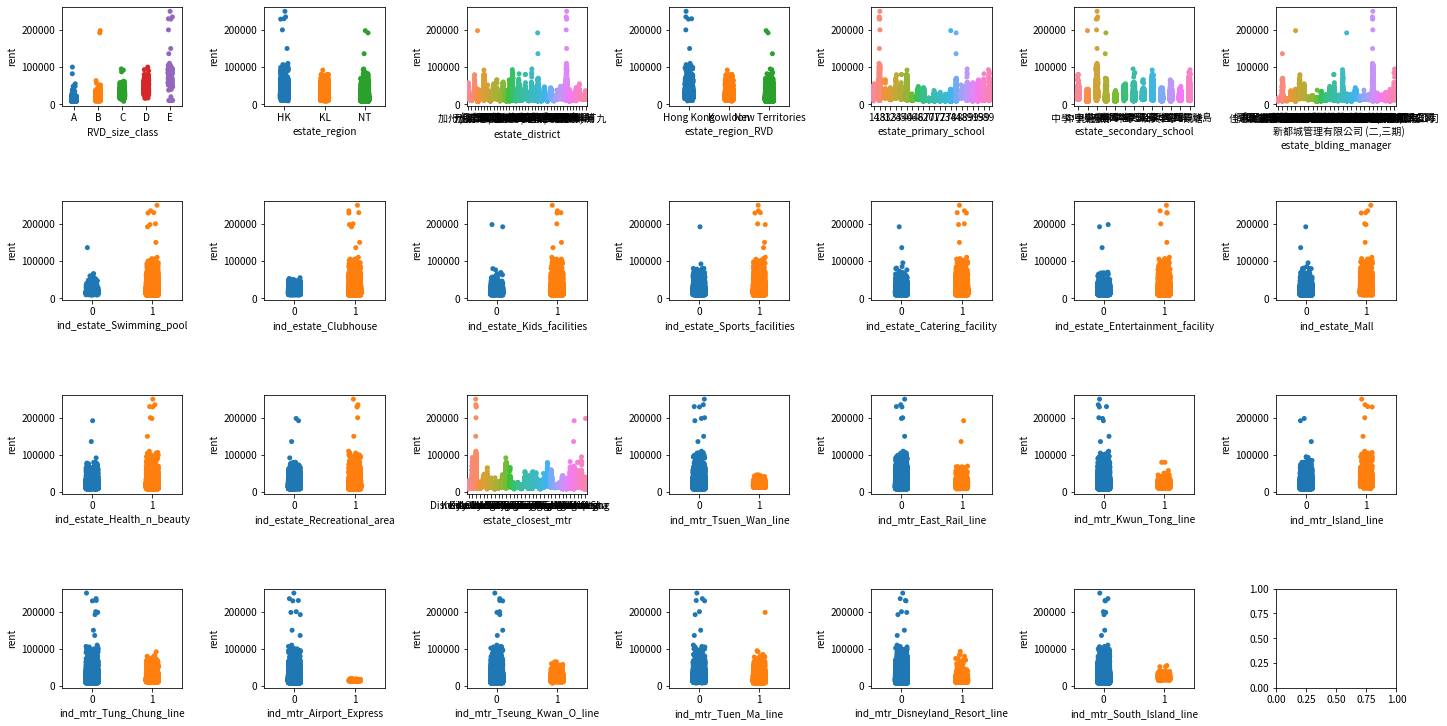

In [43]:
plot_subplots_stripplot(data[col_categorical], data["rent"], 4)

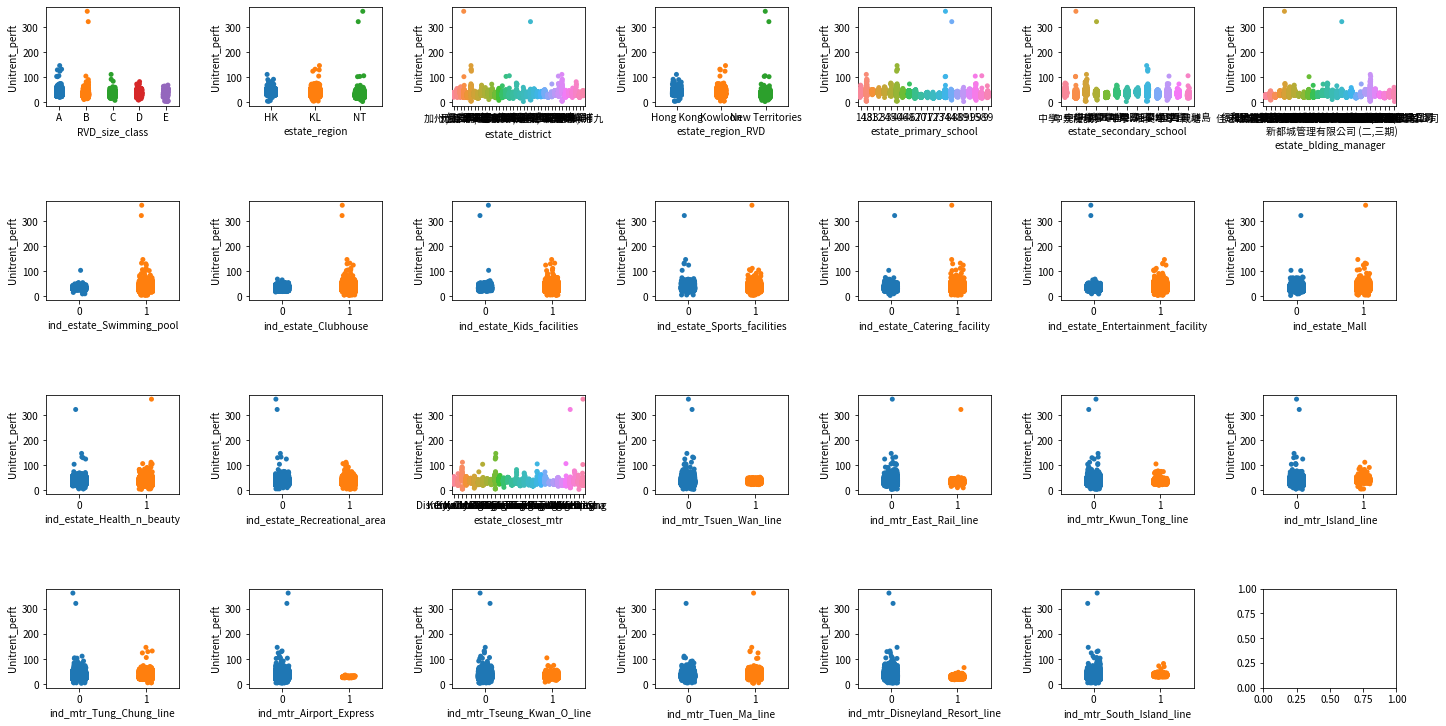

In [44]:
plot_subplots_stripplot(data[col_categorical], data["Unitrent_perft"], 4)

## Modelling<a class="anchor" id="model"></a>


### Data preparation and split<a class="anchor" id="model_data_prep"></a>


In [45]:
data = df[col_values + col_values_RVD + col_categorical + col_response].copy()

In [46]:
#data = pd.get_dummies(data[data.columns[data.dtypes == 'category']], drop_first=True)
data = data.join(pd.get_dummies(data[col_categorical], drop_first=True))
data.drop(labels=col_categorical, inplace=True, axis=1)
data.head()

,floor_level_ind,net_area_ft,area_group,bedroom,mtr_distance_m,estate_year,month_from_now,RVD Rent Index,RVD_average_rent,rent,...,ind_mtr_Tsuen_Wan_line_1,ind_mtr_East_Rail_line_1,ind_mtr_Kwun_Tong_line_1,ind_mtr_Island_line_1,ind_mtr_Tung_Chung_line_1,ind_mtr_Airport_Express_1,ind_mtr_Tseung_Kwan_O_line_1,ind_mtr_Tuen_Ma_line_1,ind_mtr_Disneyland_Resort_line_1,ind_mtr_South_Island_line_1
0,3,450,3,2,175.801766,14,0,NaN,NaN,15800,...,0,0,0,0,0,0,1,0,0,0
1,1,704,4,3,175.801766,14,0,NaN,NaN,18000,...,0,0,0,0,0,0,1,0,0,0
2,1,654,4,3,175.801766,14,0,NaN,NaN,17800,...,0,0,0,0,0,0,1,0,0,0
3,3,343,3,1,175.801766,14,0,NaN,NaN,13000,...,0,0,0,0,0,0,1,0,0,0
4,3,467,3,2,175.801766,14,0,NaN,NaN,15000,...,0,0,0,0,0,0,1,0,0,0


In [47]:
# To-DO : impute for the missing in RVD index/ avg rent instead of dropping
data.dropna(inplace=True)
print(data.shape)

(30689, 166)


In [48]:
# To-DO : try both of rent and unit rent with the models
# To-DO : use cross-valudation instead of train-test split
# To-DO : log-transform response variables before regression
# To-DO : standardise value variables before fitting models
#y = data["rent"]
y = data["Unitrent_perft"].values
X = data.drop(labels=col_response, axis=1).values
print(X.shape, y.shape)

(30689, 164) (30689,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=999)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(21482, 164) (9207, 164)
(21482,) (9207,)


### Regression model<a class="anchor" id="model_regression"></a>


In [50]:
std_x = StandardScaler(with_std=False).fit(X_train)
std_y = StandardScaler(with_std=False).fit(y_train.reshape(-1, 1))
X_train_std = std_x.transform(X_train)
X_test_std  = std_x.transform(X_test)
y_train_std = std_y.transform(y_train.reshape(-1, 1))
y_test_std  = std_y.transform(y_test.reshape(-1, 1))

In [51]:
print(list(data.drop(labels=col_response, axis=1).columns))

['floor_level_ind', 'net_area_ft', 'area_group', 'bedroom', 'mtr_distance_m', 'estate_year', 'month_from_now', 'RVD Rent Index', 'RVD_average_rent', 'RVD_size_class_B', 'RVD_size_class_C', 'RVD_size_class_D', 'RVD_size_class_E', 'estate_region_KL', 'estate_region_NT', 'estate_district_九龍灣', 'estate_district_何文田', 'estate_district_元朗市中心', 'estate_district_加州 / 錦繡 / 葡萄園', 'estate_district_南昌站', 'estate_district_大圍', 'estate_district_天水圍', 'estate_district_太古', 'estate_district_奧運站', 'estate_district_寶琳', 'estate_district_將軍澳市中心', 'estate_district_屯門市中心', 'estate_district_康城', 'estate_district_愉景灣', 'estate_district_朗屏', 'estate_district_東涌', 'estate_district_海濱區', 'estate_district_海逸', 'estate_district_深井 / 青龍頭', 'estate_district_烏溪沙', 'estate_district_珀麗灣', 'estate_district_白石角', 'estate_district_第一城 / 石門', 'estate_district_美孚站', 'estate_district_荃灣市中心', 'estate_district_荃灣西', 'estate_district_藍地', 'estate_district_藍田', 'estate_district_觀塘', 'estate_district_調景嶺', 'estate_district_貝沙灣',

In [52]:
ls = LinearRegression(fit_intercept=False)
ls.fit(X_train_std, y_train_std)
pred_train_ls = ls.predict(X_train_std)
pred_test_ls = ls.predict(X_test_std)

# The coefficients
print("Coefficients: \n", np.round(ls.intercept_,4), np.round(ls.coef_,4))

print('Training R^2: ', np.round(ls.score(X_train_std, y_train_std),4))
print('Testing R^2: ', np.round(ls.score(X_test_std, y_test_std),4))

# Apply the Fitted Model to the training set and test set
pred_train_ls = ls.predict(X_train_std)
pred_test_ls = ls.predict(X_test_std)

# Evaluate Model Performance (Mean Squared Error) on the Testing Set
print("Testing Mean squared error (Test MSE): %.2f" % np.round(np.mean((y_test_std - pred_test_ls) ** 2), 4))

Coefficients: 
 0.0 [[ 4.44300e-01 -3.80000e-03 -1.37390e+00 -3.51700e-01 -1.60000e-03
  -2.05200e-01  8.80000e-03  8.24000e-02  5.72000e-02  8.18000e-01
   4.44180e+00  6.96520e+00  1.16539e+01  6.75900e-01 -1.32510e+00
  -2.66400e-01  5.18500e-01 -6.55340e+00  1.14796e+01  7.75200e-01
   3.68600e-01 -1.61340e+00  4.70500e-01  5.75900e-01 -3.29600e-01
   2.35040e+00 -2.65890e+00 -1.67880e+00  1.76570e+00 -1.87800e+00
  -1.22340e+00 -1.14750e+00  4.04300e-01 -1.20740e+00 -2.69900e-01
   1.41950e+00  5.91200e-01  1.80340e+00 -5.10000e-02  1.75760e+00
  -9.54600e-01  4.83700e-01  2.87200e-01 -9.81700e-01 -1.04010e+00
   2.83430e+00 -2.87700e+00  1.73300e-01 -1.42240e+00 -1.23330e+00
   1.82200e-01  1.12100e-01  4.30000e-03 -6.53500e-01  1.60110e+00
  -2.02800e-01  5.27000e-02  5.18500e-01  5.16400e-01  1.45020e+00
  -2.66400e-01 -6.94500e-01  4.97000e-02 -2.99800e+00  8.22800e-01
  -1.61340e+00  3.99800e-01 -2.28600e-01  5.91200e-01  3.68600e-01
  -9.66000e-02  8.37300e-01 -6.98100e-01 -

### LASSO regression model<a class="anchor" id="model_lasso_regression"></a>


In [53]:
print(list(data.drop(labels=col_response, axis=1).columns))

['floor_level_ind', 'net_area_ft', 'area_group', 'bedroom', 'mtr_distance_m', 'estate_year', 'month_from_now', 'RVD Rent Index', 'RVD_average_rent', 'RVD_size_class_B', 'RVD_size_class_C', 'RVD_size_class_D', 'RVD_size_class_E', 'estate_region_KL', 'estate_region_NT', 'estate_district_九龍灣', 'estate_district_何文田', 'estate_district_元朗市中心', 'estate_district_加州 / 錦繡 / 葡萄園', 'estate_district_南昌站', 'estate_district_大圍', 'estate_district_天水圍', 'estate_district_太古', 'estate_district_奧運站', 'estate_district_寶琳', 'estate_district_將軍澳市中心', 'estate_district_屯門市中心', 'estate_district_康城', 'estate_district_愉景灣', 'estate_district_朗屏', 'estate_district_東涌', 'estate_district_海濱區', 'estate_district_海逸', 'estate_district_深井 / 青龍頭', 'estate_district_烏溪沙', 'estate_district_珀麗灣', 'estate_district_白石角', 'estate_district_第一城 / 石門', 'estate_district_美孚站', 'estate_district_荃灣市中心', 'estate_district_荃灣西', 'estate_district_藍地', 'estate_district_藍田', 'estate_district_觀塘', 'estate_district_調景嶺', 'estate_district_貝沙灣',

In [54]:
# To-DO : fine-tune the parameter by cross validation grid search
lasso = Lasso(fit_intercept=False, alpha=0.1).fit(X_train_std, y_train_std)

# The coefficients
print("Coefficients: \n", np.round(lasso.intercept_,4), np.round(lasso.coef_,4))

print('Training R^2: ', np.round(lasso.score(X_train_std, y_train_std),4))
print('Testing R^2: ', np.round(lasso.score(X_test_std, y_test_std),4))

pred_train_lasso = lasso.predict(X_train_std)
pred_test_lasso = lasso.predict(X_test_std)

# Evaluate Model Performance (Mean Squared Error) on the Testing Set
print("Testing Mean squared error (Test MSE): %.2f" % np.round(np.mean((y_test_std - pred_test_lasso) ** 2),4))

Coefficients: 
 0.0 [ 1.4650e-01 -2.3000e-03 -6.8100e-02 -1.1390e+00  6.0000e-04 -1.5650e-01
 -2.6800e-02 -1.7700e-02  9.4400e-02 -0.0000e+00 -0.0000e+00  0.0000e+00
  0.0000e+00  6.0870e-01 -0.0000e+00 -0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  1.3329e+00  0.0000e+00 -0.0000e+00  0.0000e+00  0.0000e+00
 -0.0000e+00  4.3260e+00 -0.0000e+00 -1.8000e-03  0.0000e+00 -0.0000e+00
 -0.0000e+00 -0.0000e+00  0.0000e+00 -0.0000e+00  0.0000e+00 -0.0000e+00
  0.0000e+00  1.5694e+00 -0.0000e+00  0.0000e+00  0.0000e+00 -0.0000e+00
 -0.0000e+00 -0.0000e+00 -0.0000e+00  0.0000e+00 -0.0000e+00  0.0000e+00
 -0.0000e+00 -0.0000e+00  0.0000e+00  0.0000e+00  3.0100e-02 -0.0000e+00
 -0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
 -0.0000e+00 -0.0000e+00  0.0000e+00 -0.0000e+00 -0.0000e+00 -0.0000e+00
 -0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
 -0.0000e+00 -8.9400e-02  0.0000e+00 -2.8169e+00 -0.0000e+00  0.0000e+00
 -0.0000e+00 -0.0000e+00  3.884

### Decision Tree model<a class="anchor" id="model_decision_tree"></a>


In [55]:
# To-DO : try other tree models

reg = tree.DecisionTreeRegressor(max_depth=5, random_state=999).fit(X_train,y_train)
yhat = reg.predict(X_test)
print("RMSE: ", np.round(np.sqrt(((y_test - yhat)**2).mean(axis=0)),4))
print("STD(y_test): ", np.round(y_test.std(),4))
print("Goodness-of-fit Measure:", np.round(r2_score(y_test, yhat),4))

RMSE:  4.2904
STD(y_test):  7.5927
Goodness-of-fit Measure: 0.6807


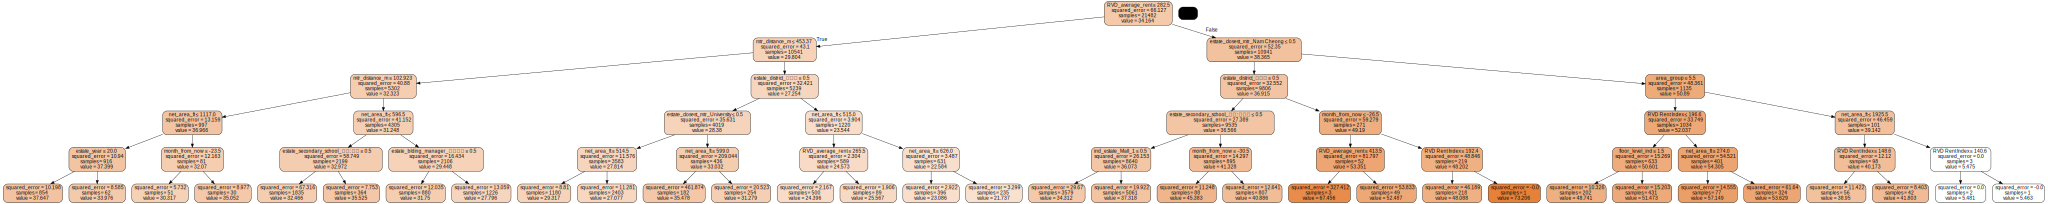

In [56]:
import pydotplus
import graphviz

dot_data = tree.export_graphviz(reg, out_file=None,
  feature_names=data.drop(labels=col_response, axis=1).columns,
  filled=True, rounded=True,
  special_characters=True) 
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"45,30!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

In [57]:
df_importance = pd.DataFrame(data={'vip':reg.feature_importances_}, index=data.drop(labels=col_response, axis=1).columns).sort_values(by=['vip'], ascending=True)
df_importance.sort_values('vip', ascending=False).head(20)

,vip
RVD_average_rent,0.455628
estate_closest_mtr_Nam Cheong,0.229608
mtr_distance_m,0.108851
estate_district_貝沙灣,0.048536
net_area_ft,0.031278
estate_secondary_school_中學: 油尖旺,0.025880
estate_district_天水圍,0.025304
ind_estate_Mall_1,0.021898
area_group,0.017685
estate_closest_mtr_University,0.012228


Text(0.5, 1.0, 'Variable Importance')

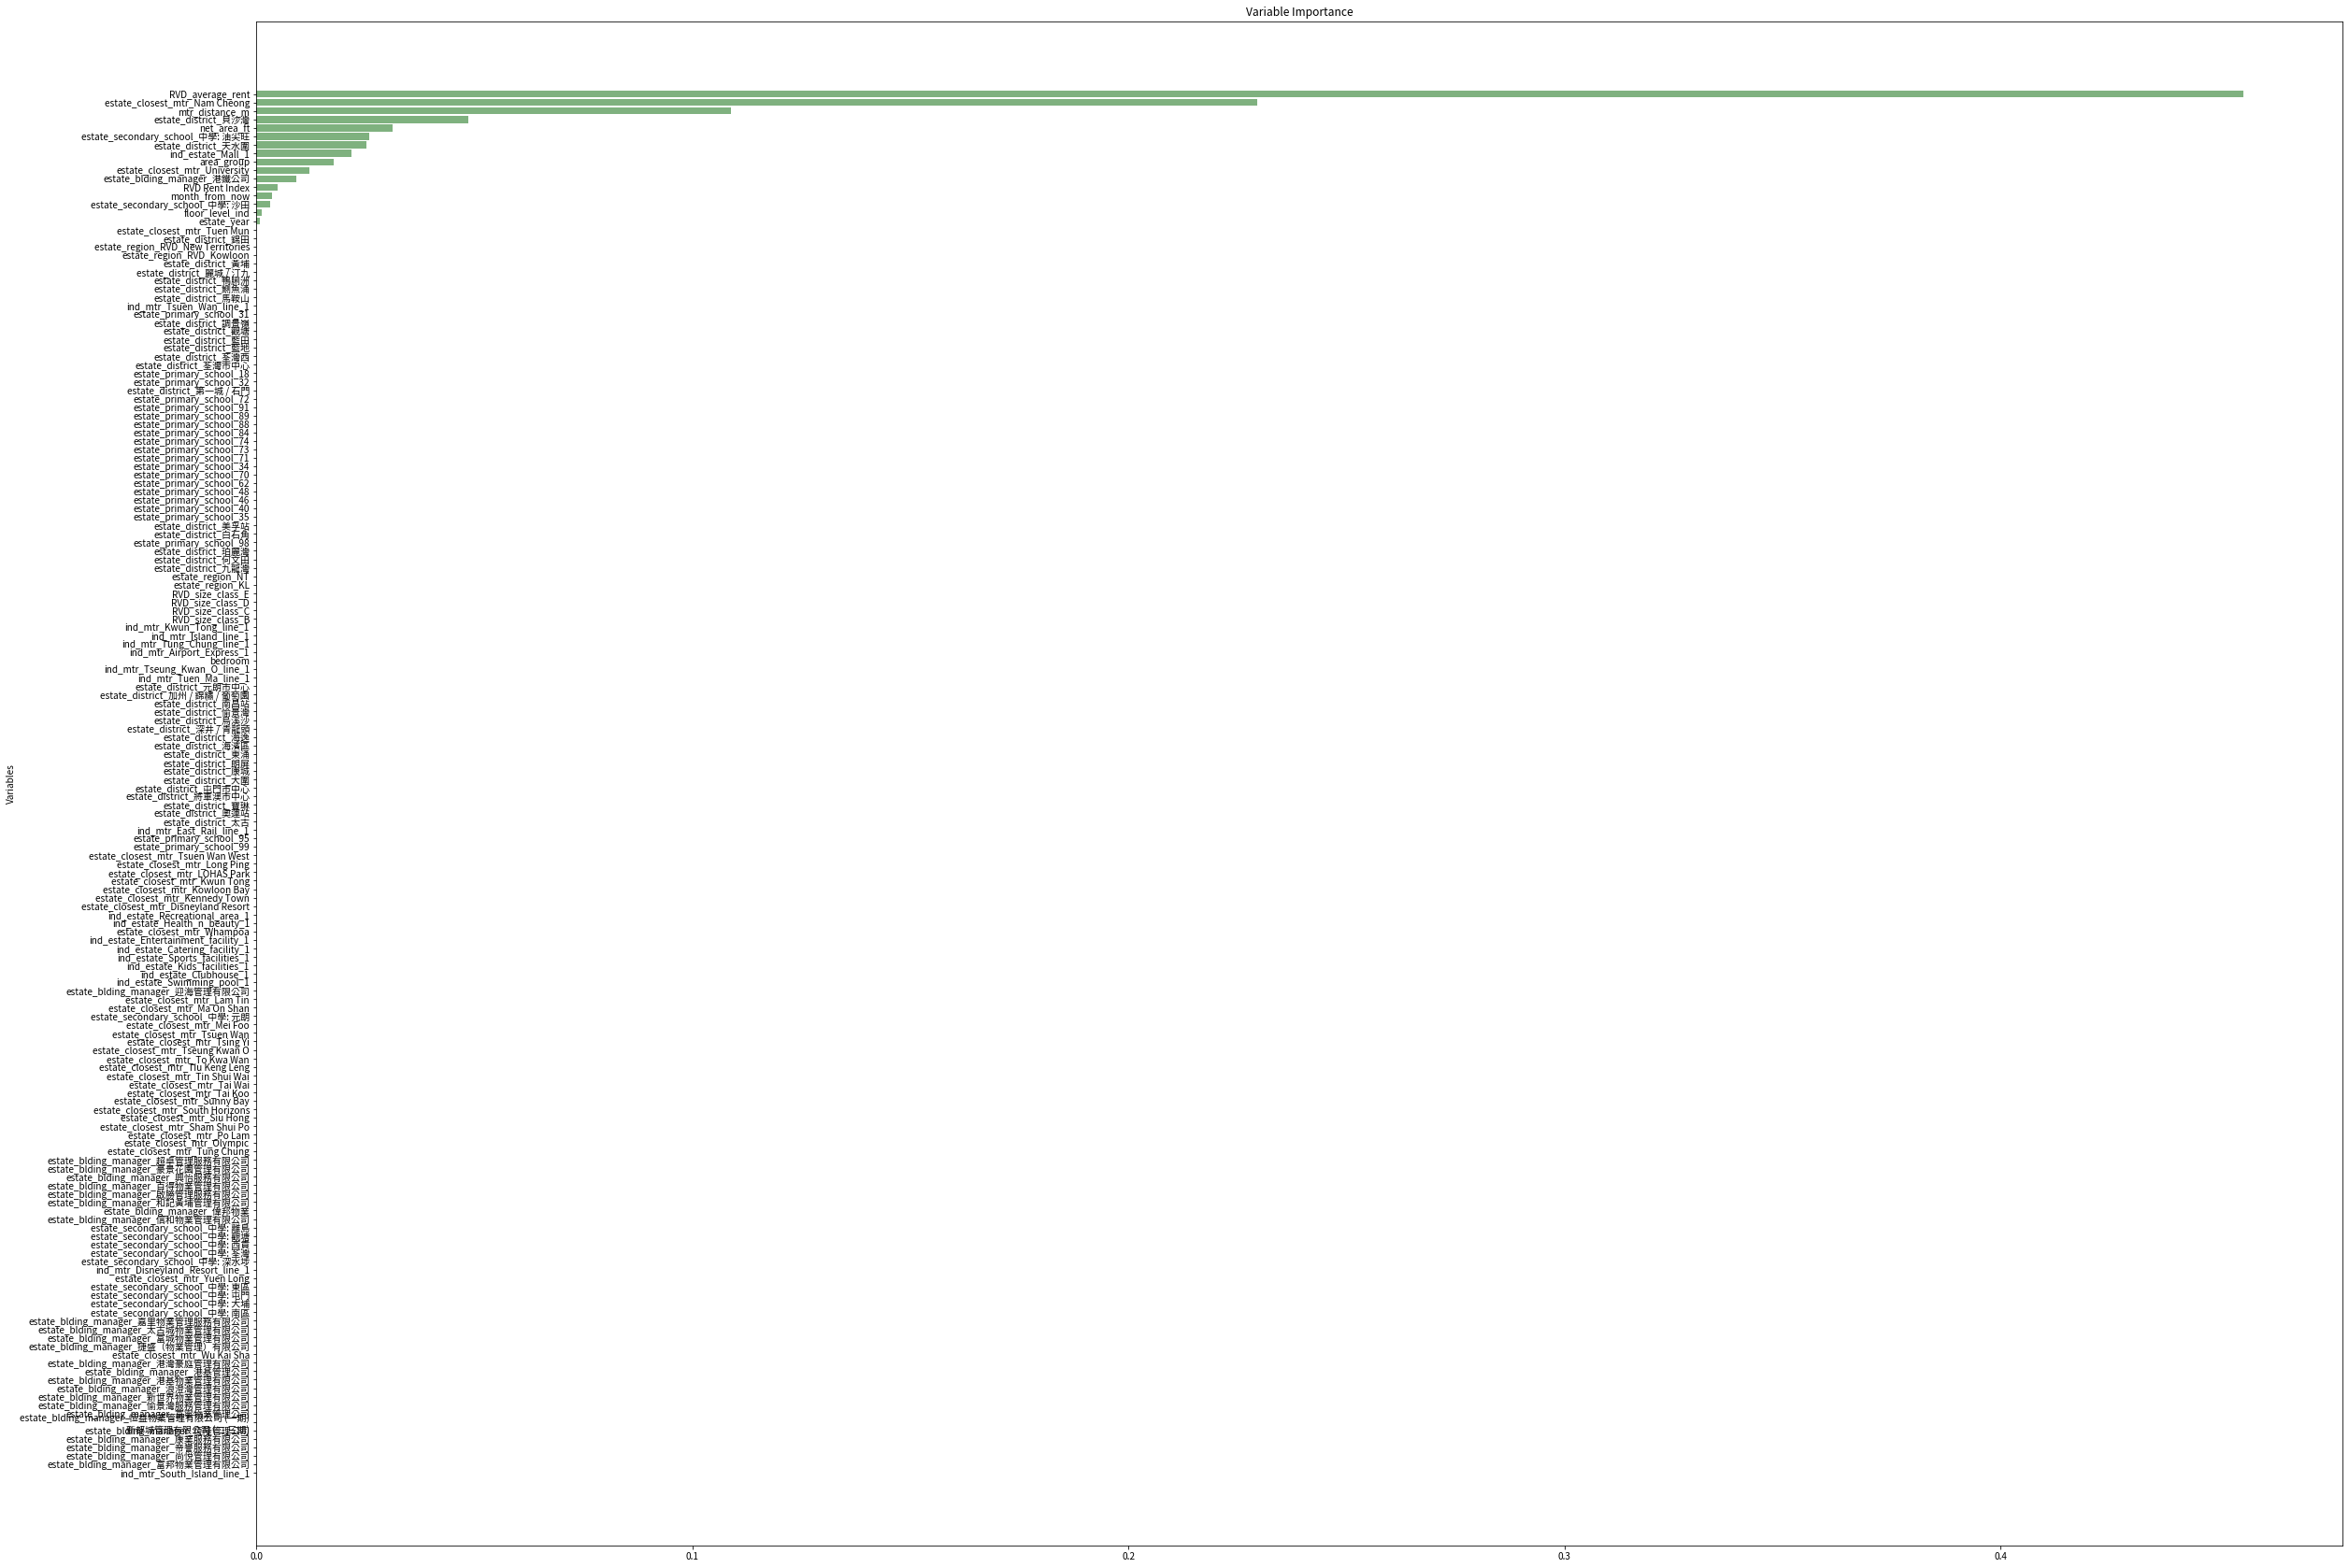

In [58]:
plt.figure(1, figsize=(40,30))
plt.title("Variable Importance vs Variable")
plt.barh(df_importance.index, df_importance['vip'], align='center', color='darkgreen', alpha=0.5)
plt.yticks(range(len(df_importance.index)))
plt.ylabel('Variables')
plt.title('Variable Importance')

### Linear Support Vector Regression model<a class="anchor" id="model_linear_SVR"></a>


In [59]:
# To-DO : ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.  ConvergenceWarning,

svr = LinearSVR(random_state=999, tol=1e-5)
svr.fit(X_train_std, np.ravel(y_train_std))
print('Accuracy score (Training set)', np.round(svr.score(X_train_std,np.ravel(y_train_std)),4))
print('Accuracy score (Test set)', np.round(svr.score(X_test_std,np.ravel(y_test_std)),4))

Accuracy score (Training set) 0.5633
Accuracy score (Test set) 0.6399


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


### Neural Networks model (To-DO)<a class="anchor" id="model_NN"></a>
